**Multi label classification of ALL images (Acute Lymphoblastic Leukemia (ALL) images) from Kaggle**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import zipfile
from sklearn.cluster import KMeans
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
import keras
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout


In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.applications.inception_v3 import InceptionV3,preprocess_input



Acute Lymphoblastic Leukemia (ALL) image dataset- from Kaggle(https://www.kaggle.com/datasets/mehradaria/leukemia)

In [ ]:
local_zip = 'Original_split.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()
%ls ./tmp/Original_split/

In [ ]:
base_dir = './tmp/Original_split'
train_dir = os.path.join(base_dir, 'train')
print(train_dir)


# Directory with our training  pictures for 4 labels
train_Benign_dir = os.path.join(train_dir, 'Benign')
print(train_Benign_dir)
train_Early_dir = os.path.join(train_dir, 'Early')
train_Pre_dir = os.path.join(train_dir, 'Pre')
train_Pro_dir = os.path.join(train_dir, 'Pro')


./tmp/Original_split/train
./tmp/Original_split/train/Benign


In [ ]:
print('total training Benign images:', len(os.listdir(train_Benign_dir)))

print('total training Early images:', len(os.listdir(train_Early_dir)))
print('total training Pre images:', len(os.listdir(train_Pre_dir)))
print('total training Pro images:', len(os.listdir(train_Pro_dir)))


total training Benign images: 405
total training Early images: 789
total training Pre images: 772
total training Pro images: 645


In [ ]:
test_dir = os.path.join(base_dir, 'test')
print(test_dir)


# Directory with our testing  pictures for 4 labels

test_Benign_dir = os.path.join(test_dir, 'Benign')
test_Early_dir = os.path.join(test_dir, 'Early')
test_Pre_dir = os.path.join(test_dir, 'Pre')
test_Pro_dir = os.path.join(test_dir, 'Pro')


./tmp/Original_split/test


In [ ]:
print('total test Benign images:', len(os.listdir(test_Benign_dir)))

print('total test Early images:', len(os.listdir(test_Early_dir)))
print('total test Pre images:', len(os.listdir(test_Pre_dir)))
print('total test Pro images:', len(os.listdir(test_Pro_dir)))


total test Benign images: 101
total test Early images: 196
total test Pre images: 191
total test Pro images: 159


In [ ]:
train_Benign_fnames = os.listdir(train_Benign_dir)
print(train_Benign_fnames[:10])

['WBC-Benign-083.jpg', 'WBC-Benign-216.jpg', 'WBC-Benign-063.jpg', 'WBC-Benign-141.jpg', 'WBC-Benign-382.jpg', 'WBC-Benign-258.jpg', 'WBC-Benign-370.jpg', 'WBC-Benign-420.jpg', 'WBC-Benign-495.jpg', 'WBC-Benign-254.jpg']


In [ ]:
train_Early_fnames = os.listdir(train_Early_dir)
print(train_Early_fnames[:10])

['WBC-Malignant-Early-067.jpg', 'WBC-Malignant-Early-179.jpg', 'WBC-Malignant-Early-886.jpg', 'WBC-Malignant-Early-808.jpg', 'WBC-Malignant-Early-773.jpg', 'WBC-Malignant-Early-116.jpg', 'WBC-Malignant-Early-738.jpg', 'WBC-Malignant-Early-690.jpg', 'WBC-Malignant-Early-581.jpg', 'WBC-Malignant-Early-168.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 2x2 configuration
nrows = 2
ncols = 2

# Index for iterating over images
pic_index = 0

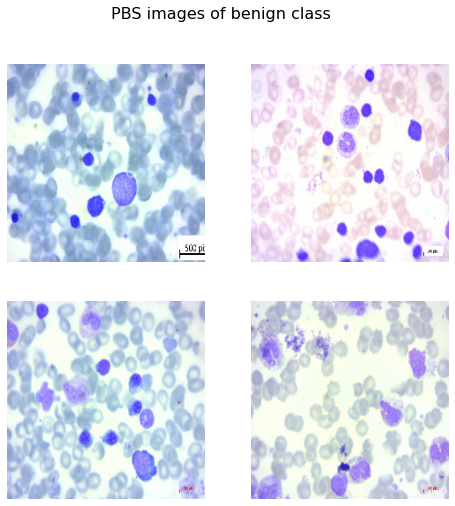

In [ ]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 4
next_mild_pix = [os.path.join(train_Benign_dir, fname)
                for fname in train_Benign_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_mild_pix):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)
fig.suptitle('PBS images of benign class', fontsize=16)

plt.show()


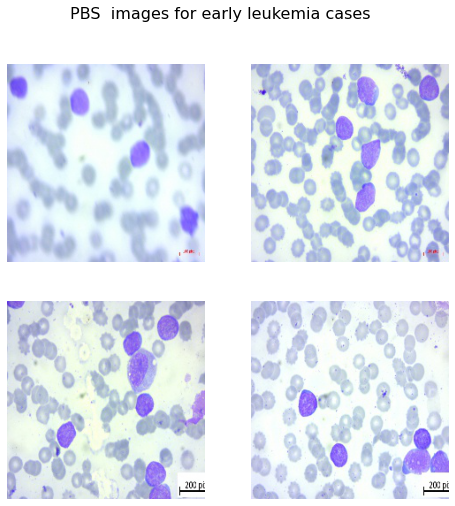

In [ ]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 4
next_moderate_pix = [os.path.join(train_Early_dir, fname)
                for fname in train_Early_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_moderate_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)
fig.suptitle('PBS  images for early leukemia cases', fontsize=16)

plt.show()


In [ ]:
import cv2 as cv
for i in range (3):
   img = cv.imread(train_Benign_dir+'/'+train_Benign_fnames[i])
   print(img.shape)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
for i in range (3):
   img = cv.imread(train_Early_dir+'/'+train_Early_fnames[i])
   print(img.shape)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  validation_split = 0.2)


In [ ]:
batch_size = 32
seed=12
Epochs=50

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  seed= seed,
  subset = 'training')

Found 2090 images belonging to 4 classes.


(32, 224, 224, 3)


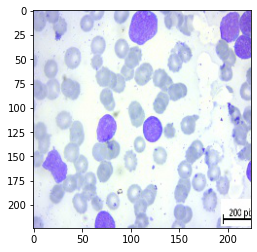

(32, 224, 224, 3)


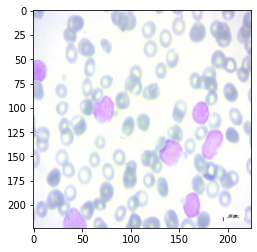

(32, 224, 224, 3)


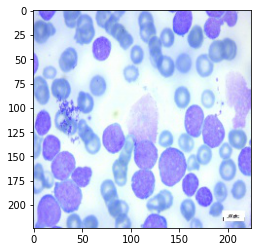

(32, 224, 224, 3)


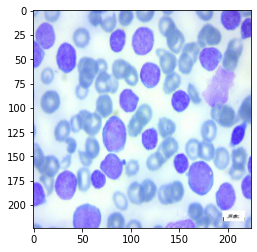

(32, 224, 224, 3)


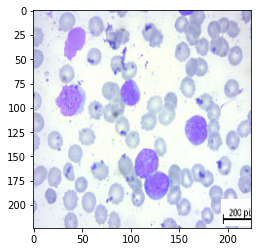

In [ ]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()


In [ ]:
class_indices=train_generator.class_indices
class_indices

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}

In [ ]:
train_generator.filenames[300]

'Benign/WBC-Benign-473.jpg'

In [ ]:
validation_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  subset = 'validation')

Found 521 images belonging to 4 classes.


(32, 224, 224, 3)


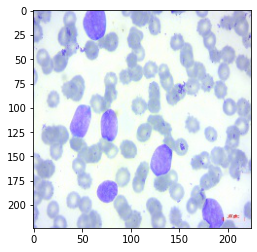

(32, 224, 224, 3)


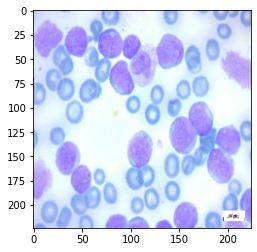

(32, 224, 224, 3)


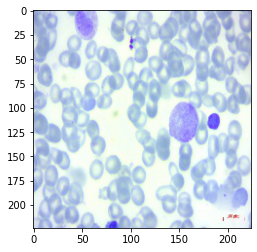

(32, 224, 224, 3)


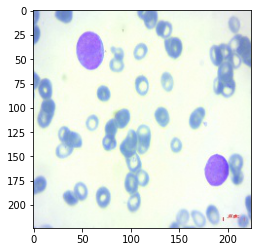

(32, 224, 224, 3)


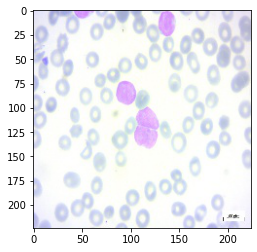

In [ ]:
for _ in range(5):
    img, label = validation_generator.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()


In [ ]:
img_input = layers.Input(shape=(224,224, 3))
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)


x = layers.Dense(64, activation='relu')(x)


output = layers.Dense(4, activation='softmax')(x)



model1 = Model(img_input, output)
model1.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        3692

In [ ]:

# compile the model
opt = optimizers.Adam()
model1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
len(train_generator)

66

In [ ]:
len(validation_generator)

17

In [ ]:
validation_steps =17

In [ ]:
# metrics = CustomMetrics(validation_generator, validation_steps)

In [ ]:
monitor_val_loss = EarlyStopping(monitor = 'val_loss',patience = 5)

In [ ]:
history1 = model1.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=2,
      steps_per_epoch=66,
      callbacks=[monitor_val_loss])

Epoch 1/30


<ipython-input-74-54559ad8a794>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(


66/66 - 221s - loss: 1.3218 - accuracy: 0.3483 - val_loss: 1.2462 - val_accuracy: 0.6008 - 221s/epoch - 3s/step
Epoch 2/30
66/66 - 208s - loss: 0.6173 - accuracy: 0.7617 - val_loss: 1.2213 - val_accuracy: 0.6583 - 208s/epoch - 3s/step
Epoch 3/30
66/66 - 207s - loss: 0.4616 - accuracy: 0.8057 - val_loss: 0.8989 - val_accuracy: 0.6679 - 207s/epoch - 3s/step
Epoch 4/30
66/66 - 206s - loss: 0.4271 - accuracy: 0.8225 - val_loss: 0.8722 - val_accuracy: 0.6910 - 206s/epoch - 3s/step
Epoch 5/30
66/66 - 206s - loss: 0.3192 - accuracy: 0.8699 - val_loss: 0.9914 - val_accuracy: 0.7332 - 206s/epoch - 3s/step
Epoch 6/30
66/66 - 213s - loss: 0.3507 - accuracy: 0.8632 - val_loss: 0.6634 - val_accuracy: 0.7793 - 213s/epoch - 3s/step
Epoch 7/30
66/66 - 216s - loss: 0.2873 - accuracy: 0.8876 - val_loss: 0.6061 - val_accuracy: 0.7658 - 216s/epoch - 3s/step
Epoch 8/30
66/66 - 214s - loss: 0.2822 - accuracy: 0.8852 - val_loss: 0.6790 - val_accuracy: 0.7735 - 214s/epoch - 3s/step
Epoch 9/30
66/66 - 206s - l

Text(0.5, 1.0, 'Training and validation loss')

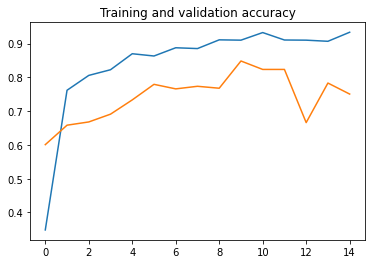

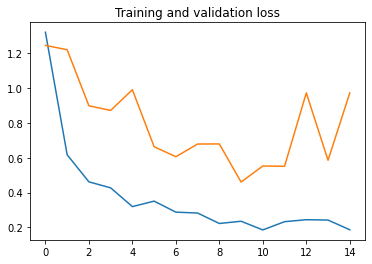

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
test_data_dir = './tmp/Original_split/test'


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
batch_size_test = 1
test_generator = test_datagen.flow_from_directory(
  test_data_dir,
  target_size = (224,224),
  batch_size = batch_size_test,
  class_mode = 'categorical',
  shuffle = False)



Found 647 images belonging to 4 classes.


In [ ]:
predIdxs = model1.predict_generator(test_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_generator.labels, predIdxs,
                            target_names=["class 1", "class 2", "class 3", "class 4"]))

<ipython-input-79-d0339398314a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predIdxs = model1.predict_generator(test_generator)


              precision    recall  f1-score   support

     class 1       0.73      0.64      0.68       101
     class 2       0.77      0.91      0.84       196
     class 3       0.99      0.83      0.91       191
     class 4       0.95      0.99      0.97       159

    accuracy                           0.87       647
   macro avg       0.86      0.85      0.85       647
weighted avg       0.88      0.87      0.87       647



**MODEL 2 (With Nuclei segmented dataset)**

In [ ]:
local_zip = 'nuclei_segmented.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()
%ls ./tmp/newfile/

test/  train/


In [ ]:
base_dir = './tmp/newfile'
train_dir = os.path.join(base_dir, 'train')
print(train_dir)


# Directory with our training  pictures for 4 labels
train_Benign_dir = os.path.join(train_dir, 'benign')
print(train_Benign_dir)
train_Early_dir = os.path.join(train_dir, 'early')
train_Pre_dir = os.path.join(train_dir, 'pre')
train_Pro_dir = os.path.join(train_dir, 'pro')


./tmp/newfile/train
./tmp/newfile/train/benign


In [ ]:
print('total training Benign images:', len(os.listdir(train_Benign_dir)))

print('total training Early images:', len(os.listdir(train_Early_dir)))
print('total training Pre images:', len(os.listdir(train_Pre_dir)))
print('total training Pro images:', len(os.listdir(train_Pro_dir)))


total training Benign images: 401
total training Early images: 789
total training Pre images: 772
total training Pro images: 645


In [ ]:
test_dir = os.path.join(base_dir, 'test')
print(test_dir)


# Directory with our testing  pictures for 4 labels

test_Benign_dir = os.path.join(test_dir, 'benign')
test_Early_dir = os.path.join(test_dir, 'early')
test_Pre_dir = os.path.join(test_dir, 'pre')
test_Pro_dir = os.path.join(test_dir, 'pro')


./tmp/newfile/test


In [ ]:
print('total test Benign images:', len(os.listdir(test_Benign_dir)))

print('total test Early images:', len(os.listdir(test_Early_dir)))
print('total test Pre images:', len(os.listdir(test_Pre_dir)))
print('total test Pro images:', len(os.listdir(test_Pro_dir)))


total test Benign images: 101
total test Early images: 196
total test Pre images: 191
total test Pro images: 159


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 2x2 configuration
nrows = 2
ncols = 2

# Index for iterating over images
pic_index = 0

In [ ]:
train_Benign_fnames = os.listdir(train_Benign_dir)
print(train_Benign_fnames[:10])

['WBC-Benign-315.jpg', 'WBC-Benign-412.jpg', 'WBC-Benign-418.jpg', 'WBC-Benign-345.jpg', 'WBC-Benign-024.jpg', 'WBC-Benign-097.jpg', 'WBC-Benign-120.jpg', 'WBC-Benign-081.jpg', 'WBC-Benign-217.jpg', 'WBC-Benign-190.jpg']


In [ ]:
train_Early_fnames = os.listdir(train_Early_dir)
print(train_Early_fnames[:10])

['WBC-Malignant-Early-152.jpg', 'WBC-Malignant-Early-373.jpg', 'WBC-Malignant-Early-953.jpg', 'WBC-Malignant-Early-661.jpg', 'WBC-Malignant-Early-687.jpg', 'WBC-Malignant-Early-681.jpg', 'WBC-Malignant-Early-593.jpg', 'WBC-Malignant-Early-775.jpg', 'WBC-Malignant-Early-872.jpg', 'WBC-Malignant-Early-759.jpg']


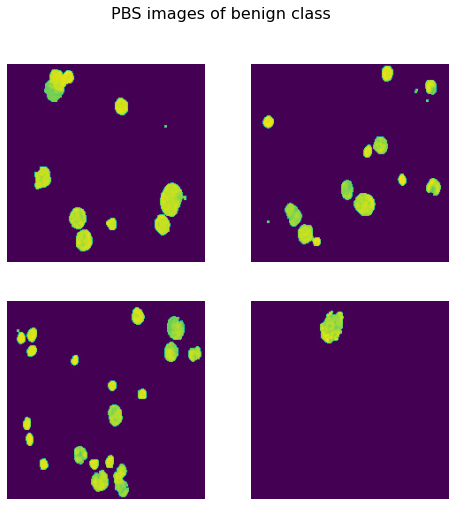

In [ ]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 4
next_mild_pix = [os.path.join(train_Benign_dir, fname)
                for fname in train_Benign_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_mild_pix):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)
fig.suptitle('PBS images of benign class', fontsize=16)

plt.show()


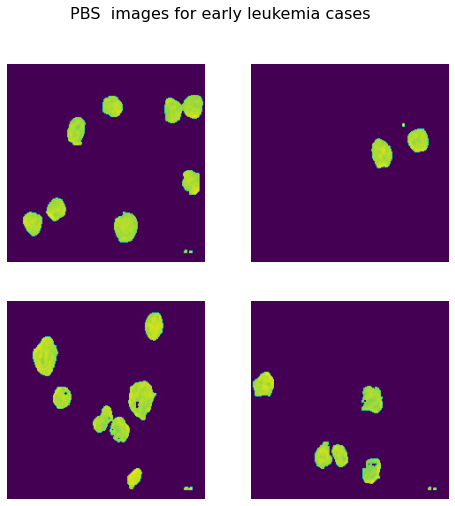

In [ ]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 4
next_moderate_pix = [os.path.join(train_Early_dir, fname)
                for fname in train_Early_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_moderate_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)
fig.suptitle('PBS  images for early leukemia cases', fontsize=16)

plt.show()


In [ ]:
import cv2 as cv
for i in range (3):
   img = cv.imread(train_Benign_dir+'/'+train_Benign_fnames[i])
   print(img.shape)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  validation_split = 0.2)


In [ ]:
batch_size = 32
seed=12
Epochs=50

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  seed= seed,
  subset = 'training')

Found 2087 images belonging to 4 classes.


(32, 224, 224, 3)


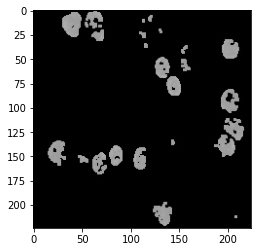

(32, 224, 224, 3)


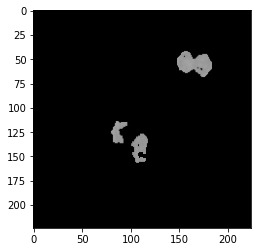

(32, 224, 224, 3)


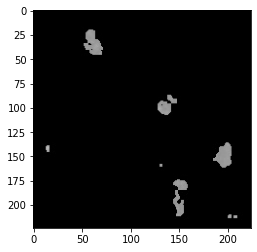

(32, 224, 224, 3)


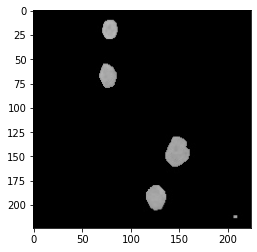

(32, 224, 224, 3)


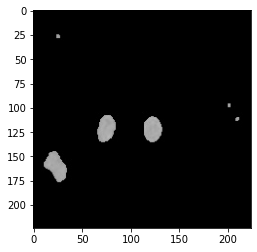

In [ ]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()


In [ ]:
class_indices=train_generator.class_indices
class_indices

{'benign': 0, 'early': 1, 'pre': 2, 'pro': 3}

In [ ]:
validation_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  subset = 'validation')

Found 520 images belonging to 4 classes.


(32, 224, 224, 3)


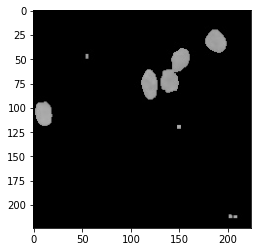

(32, 224, 224, 3)


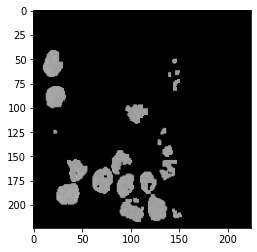

(32, 224, 224, 3)


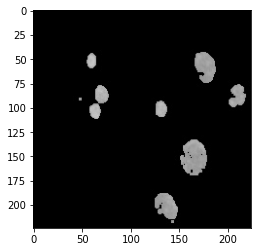

(32, 224, 224, 3)


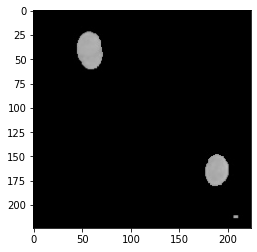

(32, 224, 224, 3)


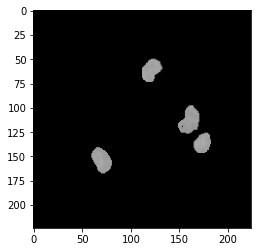

In [ ]:
for _ in range(5):
    img, label = validation_generator.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()


In [ ]:
img_input = layers.Input(shape=(224,224,3))
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)


x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)


output = layers.Dense(4, activation='softmax')(x)



nuclei_model1 = Model(img_input, output)
nuclei_model1.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 64)        36928 

In [ ]:

# compile the model
opt = optimizers.Adam()
nuclei_model1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy',f1_m])



In [ ]:
monitor_val_loss = EarlyStopping(monitor = 'val_loss',patience = 5)
nuclei_history1 = nuclei_model1.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=2,
      steps_per_epoch=66,
      callbacks=[monitor_val_loss])

<ipython-input-31-063ed0e78631>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  nuclei_history1 = nuclei_model1.fit_generator(


Epoch 1/30
66/66 - 247s - loss: 1.2125 - accuracy: 0.4542 - f1_m: 0.2263 - val_loss: 1.4182 - val_accuracy: 0.4000 - val_f1_m: 0.0071 - 247s/epoch - 4s/step
Epoch 2/30
66/66 - 241s - loss: 1.0569 - accuracy: 0.5319 - f1_m: 0.3765 - val_loss: 1.3922 - val_accuracy: 0.4346 - val_f1_m: 0.1914 - 241s/epoch - 4s/step
Epoch 3/30
66/66 - 242s - loss: 0.9785 - accuracy: 0.5827 - f1_m: 0.4970 - val_loss: 1.4530 - val_accuracy: 0.4058 - val_f1_m: 0.2986 - 242s/epoch - 4s/step
Epoch 4/30
66/66 - 238s - loss: 0.9588 - accuracy: 0.6013 - f1_m: 0.5246 - val_loss: 1.3679 - val_accuracy: 0.4577 - val_f1_m: 0.3003 - 238s/epoch - 4s/step
Epoch 5/30
66/66 - 245s - loss: 0.8392 - accuracy: 0.6689 - f1_m: 0.6281 - val_loss: 1.3828 - val_accuracy: 0.4538 - val_f1_m: 0.3375 - 245s/epoch - 4s/step
Epoch 6/30
66/66 - 237s - loss: 0.7506 - accuracy: 0.7130 - f1_m: 0.6801 - val_loss: 1.3754 - val_accuracy: 0.4846 - val_f1_m: 0.4668 - 237s/epoch - 4s/step
Epoch 7/30
66/66 - 246s - loss: 0.6451 - accuracy: 0.7547 

**MODEL 3 with Nuclei segmented dataset and RESNET-50 pretrained model**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input

**preprocessing_function = preprocess_input**

In [ ]:
train_datagen = ImageDataGenerator(
  preprocessing_function = preprocess_input,
  validation_split = 0.2)


In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  seed= seed,
  shuffle= True,
  subset = 'training')

Found 2090 images belonging to 4 classes.


In [ ]:
class_indices=train_generator.class_indices
class_indices

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}

(32, 224, 224, 3)


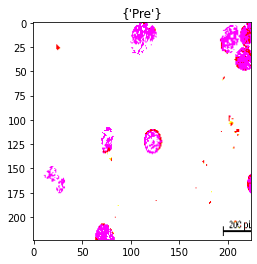

(32, 224, 224, 3)


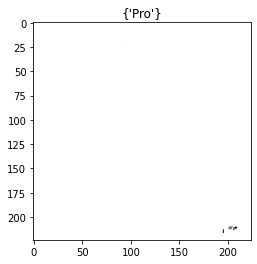

(32, 224, 224, 3)


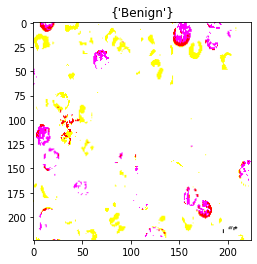

(32, 224, 224, 3)


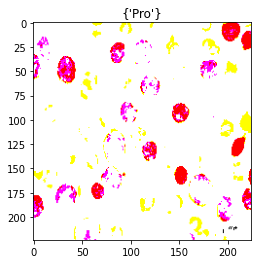

(32, 224, 224, 3)


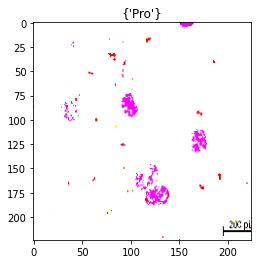

In [ ]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)
    label = np.argmax(label[i])
    value = {i for i in class_indices if class_indices[i]==label}
    plt.title(value)
    plt.imshow(img[0])
    plt.show()


In [ ]:
validation_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle = True,
  subset = 'validation')

Found 521 images belonging to 4 classes.


(32, 224, 224, 3)


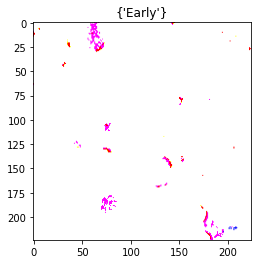

(32, 224, 224, 3)


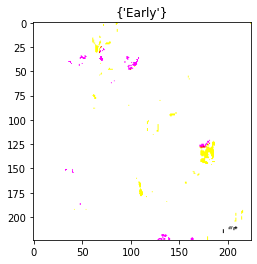

(32, 224, 224, 3)


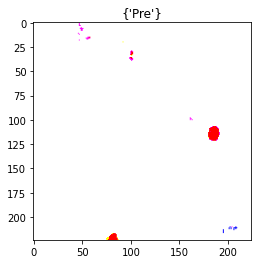

(32, 224, 224, 3)


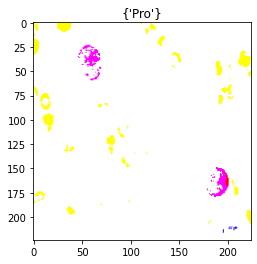

(32, 224, 224, 3)


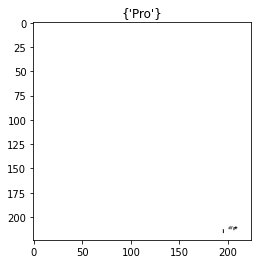

In [ ]:

for _ in range(5):
    img, label = validation_generator.next()
    print(img.shape)
    label = np.argmax(label[i])
    value = {i for i in class_indices if class_indices[i]==label}
    plt.title(value)
    plt.imshow(img[0])
    plt.show()


In [ ]:
img_width=224
img_height=224
num_channels=3


**RESNET50 for feature extraction**

In [ ]:
input_shape = (img_width,img_height,num_channels)
# network architecture

rn50 = ResNet50(input_shape = (img_width,img_height,num_channels), include_top = False)
#rn50.summary()

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
#Create metrics. Code from https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
#freeze all layers
for layer in rn50.layers:
    layer.trainable = False

x = Flatten()(rn50.output)
x = Dense(1000, activation='relu')(x)
output = Dense(4, activation = 'softmax')(x)



In [ ]:
model2 = Model(inputs = rn50.inputs, outputs = output)

# compile network

model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy',f1_m])

# view network architecture

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
early_stopping = EarlyStopping(monitor='val_f1_m', patience=5)

# train the network

history2 = model2.fit(x = train_generator,
                    validation_data = validation_generator,
                    batch_size = batch_size,
                    epochs = Epochs,
                    steps_per_epoch=66,
                    callbacks = [early_stopping])


Epoch 1/50
66/66 [==============================] - 661s 10s/step - loss: 12.3192 - accuracy: 0.8258 - f1_m: 0.8246 - val_loss: 2.3734 - val_accuracy: 0.9194 - val_f1_m: 0.9228
Epoch 2/50
66/66 [==============================] - 651s 10s/step - loss: 0.2818 - accuracy: 0.9794 - f1_m: 0.9796 - val_loss: 1.1266 - val_accuracy: 0.9674 - val_f1_m: 0.9688
Epoch 3/50
66/66 [==============================] - 609s 9s/step - loss: 0.0897 - accuracy: 0.9914 - f1_m: 0.9915 - val_loss: 1.2986 - val_accuracy: 0.9347 - val_f1_m: 0.9328
Epoch 4/50
66/66 [==============================] - 652s 10s/step - loss: 0.0627 - accuracy: 0.9923 - f1_m: 0.9924 - val_loss: 2.9380 - val_accuracy: 0.9347 - val_f1_m: 0.9328
Epoch 5/50
66/66 [==============================] - 648s 10s/step - loss: 0.0574 - accuracy: 0.9962 - f1_m: 0.9962 - val_loss: 1.0907 - val_accuracy: 0.9482 - val_f1_m: 0.9504
Epoch 6/50
66/66 [==============================] - 650s 10s/step - loss: 0.0249 - accuracy: 0.9962 - f1_m: 0.9962 - val

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_datagen.flow_from_directory(
  test_data_dir,
  target_size = (224,224),
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle = False)



Found 647 images belonging to 4 classes.


In [ ]:
predIdxs = model2.predict_generator(test_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_generator.labels, predIdxs,
                            target_names=["class 1", "class 2", "class 3", "class 4"]))

<ipython-input-63-2922c11a26ee>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predIdxs = model2.predict_generator(test_generator)


              precision    recall  f1-score   support

     class 1       0.95      0.81      0.88       101
     class 2       0.88      0.98      0.93       196
     class 3       1.00      0.97      0.98       191
     class 4       1.00      0.99      1.00       159

    accuracy                           0.95       647
   macro avg       0.96      0.94      0.95       647
weighted avg       0.96      0.95      0.95       647



In [ ]:
print(confusion_matrix(test_generator.labels, predIdxs))
# confusion_matrix(predicted_categories, true_categories)

[[ 82  19   0   0]
 [  4 192   0   0]
 [  0   6 185   0]
 [  0   1   0 158]]


**So far model 3 with nuclei segmented dataset and RESNET50 pretrained model for feature extraction is the best performing model**

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model2.save('saved_model/my_model')

In [ ]:
!zip -r /content/newmodel.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 96%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 92%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/fingerprint.pb (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 80%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 24%)


In [ ]:
local_zip = 'segmented_classwise_split.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()
%ls ./tmp/segmented_classwise_split/

test/  train/


In [ ]:
base_dir = './tmp/segmented_classwise_split'
train_dir = os.path.join(base_dir, 'train')
print(train_dir)


# Directory with our training  pictures for 4 labels
train_Benign_dir = os.path.join(train_dir, 'Benign')
print(train_Benign_dir)
train_Early_dir = os.path.join(train_dir, 'Early')
train_Pre_dir = os.path.join(train_dir, 'Pre')
train_Pro_dir = os.path.join(train_dir, 'Pro')


./tmp/segmented_classwise_split/train
./tmp/segmented_classwise_split/train/Benign


In [ ]:
print('total training Benign images:', len(os.listdir(train_Benign_dir)))

print('total training Early images:', len(os.listdir(train_Early_dir)))
print('total training Pre images:', len(os.listdir(train_Pre_dir)))
print('total training Pro images:', len(os.listdir(train_Pro_dir)))


total training Benign images: 401
total training Early images: 789
total training Pre images: 772
total training Pro images: 645


In [ ]:
test_dir = os.path.join(base_dir, 'test')
print(test_dir)


# Directory with our testing  pictures for 4 labels

test_Benign_dir = os.path.join(test_dir, 'Benign')
test_Early_dir = os.path.join(test_dir, 'Early')
test_Pre_dir = os.path.join(test_dir, 'Pre')
test_Pro_dir = os.path.join(test_dir, 'Pro')


./tmp/segmented_classwise_split/test


In [ ]:
print('total test Benign images:', len(os.listdir(test_Benign_dir)))

print('total test Early images:', len(os.listdir(test_Early_dir)))
print('total test Pre images:', len(os.listdir(test_Pre_dir)))
print('total test Pro images:', len(os.listdir(test_Pro_dir)))


total test Benign images: 101
total test Early images: 196
total test Pre images: 191
total test Pro images: 146


In [ ]:
train_Benign_fnames = os.listdir(train_Benign_dir)
print(train_Benign_fnames[:10])

['WBC-Benign-344.jpg', 'WBC-Benign-241.jpg', 'WBC-Benign-340.jpg', 'WBC-Benign-479.jpg', 'WBC-Benign-492.jpg', 'WBC-Benign-500.jpg', 'WBC-Benign-458.jpg', 'WBC-Benign-192.jpg', 'WBC-Benign-061.jpg', 'WBC-Benign-102.jpg']


In [ ]:
train_Early_fnames = os.listdir(train_Early_dir)
print(train_Early_fnames[:10])

['WBC-Malignant-Early-829.jpg', 'WBC-Malignant-Early-331.jpg', 'WBC-Malignant-Early-179.jpg', 'WBC-Malignant-Early-014.jpg', 'WBC-Malignant-Early-605.jpg', 'WBC-Malignant-Early-284.jpg', 'WBC-Malignant-Early-539.jpg', 'WBC-Malignant-Early-487.jpg', 'WBC-Malignant-Early-127.jpg', 'WBC-Malignant-Early-394.jpg']


**Original dataset with inception_V3 pretrained model for feature selection.**

**The weights are trained on Imagenet dataset.**

**MODEL 4**

In [ ]:
local_zip = 'Original_split.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()
%ls ./tmp/Original_split/

test/  train/


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-02-27 06:03:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  44.4MB/s    in 1.9s    

2023-02-27 06:03:35 (44.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
base_dir = './tmp/Original_split'
train_dir = os.path.join(base_dir, 'train')
print(train_dir)


./tmp/Original_split/train


In [ ]:
test_dir = os.path.join(base_dir, 'test')
print(test_dir)


./tmp/Original_split/test


In [ ]:
train_datagen = ImageDataGenerator(
   rescale = 1./255,
  validation_split = 0.2)


In [ ]:
batch_size = 32
seed=12
Epochs=50

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle='True',
  seed= seed,
  subset = 'training')

Found 2090 images belonging to 4 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (224,224), # auto-resize your images
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle='True',
  subset = 'validation')

Found 521 images belonging to 4 classes.


In [ ]:
img_width=224
img_height=224
num_channels=3


**inception_V3 pretrained model for feature selection**

In [ ]:
# loading the weights of inception_V3 without the top layer. These weights are trained on Imagenet dataset.

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(224, 224, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

# this will exclude the initial layers from training phase as there are already been trained.
for layer in pre_trained_model.layers:
    # print(layer.name)
    layer.trainable = False

# last_layer = pre_trained_model.get_layer('mixed7')
# print('last layer output shape:', last_layer.output_shape)
# last_output = last_layer.output

In [ ]:
print(type(pre_trained_model.output))

<class 'keras.engine.keras_tensor.KerasTensor'>


In [ ]:
print(pre_trained_model.output.shape)

(None, 5, 5, 2048)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 100 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for classification
x = layers.Dense(4, activation='softmax')(x)

# Configure and compile the model
model4 = Model(pre_trained_model.input, x)
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m])

In [ ]:
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [ ]:
early_stopping = EarlyStopping(monitor='val_f1_m', patience=5)

# train the network

history4 = model4.fit(x = train_generator,
                    validation_data = validation_generator,
                    batch_size = batch_size,
                    epochs = Epochs,
                    steps_per_epoch=66,
                    callbacks = [early_stopping])


Epoch 1/50
66/66 [==============================] - 348s 5s/step - loss: 3.0370 - accuracy: 0.7526 - f1_m: 0.7501 - val_loss: 0.6556 - val_accuracy: 0.8196 - val_f1_m: 0.8150
Epoch 2/50
66/66 [==============================] - 336s 5s/step - loss: 0.2708 - accuracy: 0.9081 - f1_m: 0.9031 - val_loss: 0.7057 - val_accuracy: 0.8100 - val_f1_m: 0.8158
Epoch 3/50
66/66 [==============================] - 337s 5s/step - loss: 0.1823 - accuracy: 0.9287 - f1_m: 0.9310 - val_loss: 0.5514 - val_accuracy: 0.8848 - val_f1_m: 0.8825
Epoch 4/50
66/66 [==============================] - 337s 5s/step - loss: 0.2058 - accuracy: 0.9158 - f1_m: 0.9149 - val_loss: 0.3605 - val_accuracy: 0.8791 - val_f1_m: 0.8878
Epoch 5/50
66/66 [==============================] - 317s 5s/step - loss: 0.2226 - accuracy: 0.8986 - f1_m: 0.8971 - val_loss: 0.4364 - val_accuracy: 0.8618 - val_f1_m: 0.8606
Epoch 6/50
66/66 [==============================] - 338s 5s/step - loss: 0.2047 - accuracy: 0.9134 - f1_m: 0.9160 - val_loss:

In [ ]:
test_data_dir = './tmp/Original_split/test'

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
batch_size_test = 1
test_generator = test_datagen.flow_from_directory(
  test_data_dir,
  target_size = (224,224),
  batch_size = batch_size_test,
  class_mode = 'categorical',
  shuffle = False)



Found 647 images belonging to 4 classes.


In [ ]:
predIdxs = model4.predict_generator(test_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_generator.labels, predIdxs,
                            target_names=["class 1", "class 2", "class 3", "class 4"]))

<ipython-input-58-d2249ed344c5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predIdxs = model4.predict_generator(test_generator)


              precision    recall  f1-score   support

     class 1       0.85      0.76      0.80       101
     class 2       0.82      0.92      0.87       196
     class 3       1.00      0.90      0.95       191
     class 4       0.97      0.99      0.98       159

    accuracy                           0.91       647
   macro avg       0.91      0.89      0.90       647
weighted avg       0.91      0.91      0.91       647



In [ ]:
print(confusion_matrix(test_generator.labels, predIdxs))
# confusion_matrix(predicted_categories, true_categories)

[[ 64  33   2   2]
 [  5 190   0   1]
 [  0   7 183   1]
 [  0   1   1 157]]


**This model performs well for the original dataset without any segmentation.**

**CONCLUSION:** Comparing model 3 (nuclei segmented dataset with RESNET50 for feature extraction) and model 4 (original dataset with Inception V3 for feature extraction)...




Since this is a medical dataset,false negatives are more important and they should be NIL.

Model 3 has 11 FN and 19 FP.
Model 4 has 14 FN and 39 Fp .
Model 3 slightly performs better.

Looking at the confusion matrix ,most of the samples wrongly categorized as class 2 (early).With more domain knowledge,image segmentation should concentrate on categorizing samples as benign and early properly to train the model accurately.